# Descriptive Statistics

In [50]:
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

### Population and samples 
- **Population:** set of all elements you're interested in 
- **Sample**: a subset of a population

In [53]:
population = [5, 10, 15, 20]
sample_size = 2
sample = rand.sample(population, sample_size)
print(sample)

[5, 20]


### Types of Measures
- **Central Tendency:** tells you about the centres of data e.g. mean, median and mode
- **Variability:** tells you about the spread of data e.g. variance and standard deviation
- **Correlation or joint variability:** tells you about the relation between a pair of variables in a dataset e.g. correlation coefficient

### Central Tendancy

#### Mean

The sample mean or sample arithmetic mean is the average value of a sample of data. It is calculated by adding up all the values in the sample and then dividing by the number of values in the sample.

In [28]:
x = [23, 45, 12, 34, 56, 32, 44, 67, 39, 50]
mean = sum(x) / len(x)
mean2 = statistics.mean(x)
mean3 = statistics.fmean(x)  # a faster implementation of mean
print(mean, mean2, mean3)


x_nan = [23, np.nan, 12, 34, 56, 32, 44, 67, 39, 50]
mean4 = sum(x_nan) / len(x_nan)
mean5 = statistics.mean(x_nan)
mean6 = statistics.fmean(x_nan)
mean7 = np.mean(x_nan)
mean8 = np.nanmean(x_nan)  # ignore nan values
print(mean4, mean5, mean6, mean7, mean8)

40.2 40.2 40.2
nan nan nan nan 39.666666666666664


#### Weighted mean

The weighted mean is a type of average where each value in the dataset is assigned a weight. The weighted mean is calculated by multiplying each value by its weight, summing up the products, and then dividing by the sum of the weights.

The weighted mean is often used when some values in the dataset are considered more important than others.

In [29]:
# Define the data values
x = [8.0, 1, 2.5, 4, 28.0]
# Define the weights for each data value
w = [0.1, 0.2, 0.3, 0.25, 0.15]

# Calculate the weighted mean by multiplying each data value by its weight,
# summing the products, and then dividing by the sum of the weights
weighted_mean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
weighted_mean2 = np.average(x,weights=w)
# Print the result
print(weighted_mean, weighted_mean2)

6.95 6.95


In [30]:
y = [80,85,90]
z = [0.2,0.3,0.5]

print(np.average(y, weights=z))

86.5


#### Harmonic mean

The harmonic mean is a type of average that is calculated by dividing the number of values in the dataset by the sum of the reciprocals of the values. In other words, if you have a dataset with n values, the harmonic mean is calculated as n divided by the sum of 1/x for each value x in the dataset.

The harmonic mean is often used when dealing with rates or ratios. 

In [31]:
x = [8.0, 1, 2.5, 4, 28.0]
hmean = len(x) / sum(1 / item for item in x)
hmean2 = statistics.harmonic_mean(x)
hmean3 = scipy.stats.hmean(x)
print(hmean, hmean2, hmean3)

2.7613412228796843 2.7613412228796843 2.7613412228796843


#### Geometric mean 

The geometric mean is a type of average that is calculated by taking the nth root of the product of n values in a dataset. In other words, if you have a dataset with n values, the geometric mean is calculated by multiplying all the values together and then taking the nth root of the result.

The geometric mean is often used when dealing with values that vary over several orders of magnitude or when calculating average growth rates. 

In [32]:
a = [1.1, 1.2, 1.3]

mean = scipy.stats.gmean(a)
mean2 = statistics.geometric_mean(a)

print(mean, mean2)

1.197215767258376 1.197215767258376


#### Median
The sample median is the middle element of a sorted dataset. If 𝑛 is even, then the median is the arithmetic mean of the two values in the middle

In [33]:
x = [8.0, 1, 2.5, 4, 28.0, 5.5]

# Calculate the length of the dataset
n = len(x)

# Check if the number of values in the dataset is odd
if n % 2 != 0:
    # If the number of values is odd, calculate the median as
    # the middle value of the sorted dataset
    median = sorted(x)[round(0.5 * (n - 1))]
else:
    # If the number of values is even, calculate the median
    # as the average of the two middle values of the sorted dataset
    x_sorted, index = sorted(x), round(0.5 * n)
    median = 0.5 * (x_sorted[index - 1] + x_sorted[index])

median2 = statistics.median(x)
median_low = statistics.median_low(x)
median_high = statistics.median_high(x)
# Print the result
print(median, median2, median_low, median_high)

4.75 4.75 4 5.5


#### Mode

The sample mode is the value in the dataset that occurs most frequently. If there isn’t a single such value, then the set is multimodal since it has multiple modal values.

In [34]:
u = [2, 3, 2, 8, 8, 12]
mode = max((u.count(item), item) for item in set(u))[1]

mode2 = scipy.stats.mode(u)
mode3 = statistics.multimode(u)
print(mode, mode2, mode3)

8 ModeResult(mode=array([2]), count=array([2])) [2, 8]


### Dispersion

#### Range
The range of data is the difference between the maximum and minimum element in the dataset.



In [39]:
x = [8.0, 1, 2.5, 4, 28.0]

my_range = max(x) - min(x)
my_range2 = np.ptp(x)

print(my_range, my_range2)

27.0 27.0


#### Variance
The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean.

In [35]:
x = [2, 3, 2, 8,8, 12]
n = len(x)
mean = sum(x) / n
var = sum((item - mean)**2 for item in x) / (n - 1)
var2 = np.var(y, ddof=1)
var3 = statistics.variance(x)
print(var,var2, var3)

16.966666666666665 25.0 16.966666666666665


#### Standard Deviation

The sample standard deviation is another measure of data spread. It’s connected to the sample variance, as standard deviation, 𝑠, is the positive square root of the sample variance.




In [36]:
std = var**0.5
std2 = statistics.stdev(x)
std3 = np.std(x, ddof=1)

print(std, std2, std3)

4.119061381755152 4.119061381755152 4.119061381755152


### Distribution

#### Skewness

 if using Fisher’s definition of kurtosis, a positive kurtosis value indicates a leptokurtic distribution with more frequent extreme values than a normal distribution, while a negative kurtosis value indicates a platykurtic distribution with fewer extreme values than a normal distribution.

In [37]:
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
# calculate sample mean
mean = sum(x) / n
# calculate sample variance
var = sum((item - mean) ** 2 for item in x) / (n - 1)
# calculate sample standard deviation
std = var**0.5
# calculate sample skewness
skew = sum((item - mean) ** 3 for item in x) * n / ((n - 1) * (n - 2) * std**3)
skew2 = scipy.stats.skew(x, bias=False)
print(skew, skew2)

1.9470432273905929 1.9470432273905927


#### Kurtosis 
Kurtosis is a measure of the “tailedness” of the distribution of a dataset. It indicates how much of the data is concentrated in the tails of the distribution, relative to a normal distribution. 

If using Fisher’s definition of kurtosis, a positive kurtosis value indicates a leptokurtic distribution with more frequent extreme values than a normal distribution, while a negative kurtosis value indicates a platykurtic distribution with fewer extreme values than a normal distribution.

In [49]:
# dataset
x = [8.0, 1, 2.5, 4, 28.0]

# calculate the kurtosis of x
kurt = scipy.stats.kurtosis(x)

print(f"Kurtosis of x: {kurt}")

Kurtosis of x: -0.030495095281138695


#### Percentiles

A percentile is a measure that indicates the value below which a given percentage of the data in a dataset falls. For example, the 25th percentile is the value below which 25% of the data falls.

In [38]:
x = [8.0, 1, 2.5, 4, 28.0]

# calculate the 25th percentile
p25 = np.percentile(x, 25)

# calculate the 50th percentile (median)
p50 = np.percentile(x, 50)

# calculate the 75th percentile
p75 = np.percentile(x, 75)

print(f"25th percentile: {p25}")
print(f"50th percentile: {p50}")
print(f"75th percentile: {p75}")

25th percentile: 2.5
50th percentile: 4.0
75th percentile: 8.0


### Joint Variability 

#### Covariance 

Covariance is a measure of the joint variability between two random variables. It indicates the degree to which two variables change together. If the covariance between two variables is positive, it means that the two variables tend to increase or decrease together. If the covariance is negative, it means that when one variable increases, the other tends to decrease, and vice versa.

In [40]:
x = [8.0, 1, 2.5, 4, 28.0]
y = [0.5, 4, 2.2, 3.7, 14]

# calculate the covariance between x and y
cov_xy = np.cov(x, y)[0][1]

print(f"Covariance between x and y: {cov_xy}")

Covariance between x and y: 52.005


#### Correlation Coefficient

A correlation coefficient is a standardized measure of the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, with -1 indicating a perfect negative linear relationship, 0 indicating no linear relationship, and 1 indicating a perfect positive linear relationship.

The most commonly used correlation coefficient is the Pearson correlation coefficient, which measures the linear relationship between two continuous variables. Another commonly used correlation coefficient is the Spearman correlation coefficient, which measures the monotonic relationship between two variables, whether the relationship is linear or not.



In [41]:
x = [8.0, 1, 2.5, 4, 28.0]
y = [0.5, 4, 2.2, 3.7, 14]

# calculate the correlation coefficient between x and y
corr_xy = np.corrcoef(x, y)[0][1]

print(f"Correlation coefficient between x and y: {corr_xy}")

Correlation coefficient between x and y: 0.8865997495580011


### Analysis Types

It involves summarizing and describing the main characteristics of the variable, such as its central tendency (mean, median, mode), dispersion (range, variance, standard deviation), and distribution (skewness, kurtosis).

- **univariate:** one variable
- **bivariate:** two variables
- **multivariate:** three or mare variables 



#### Univariate

In [42]:
# Create a sample data set
data = {'ages': [23, 45, 12, 34, 56, 32, 44, 67, 39, 50]}
df = pd.DataFrame(data)

# Calculate descriptive statistics
mean = df['ages'].mean()
median = df['ages'].median()
mode = df['ages'].mode()
std_dev = df['ages'].std()

# Print results
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode[0])
print('Standard Deviation:', std_dev)

Mean: 40.2
Median: 41.5
Mode: 12
Standard Deviation: 15.984714921171134


#### Bivariate

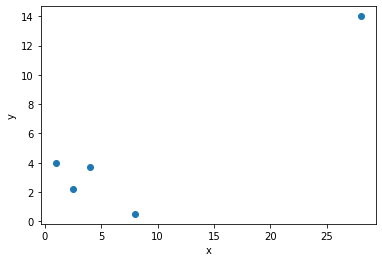

Correlation coefficient between x and y: 0.8865997495580011


In [44]:
x = [8.0, 1, 2.5, 4, 28.0]
y = [0.5, 4, 2.2, 3.7, 14]

# create a scatter plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# calculate the correlation coefficient between x and y
corr_xy = np.corrcoef(x, y)[0][1]

print(f"Correlation coefficient between x and y: {corr_xy}")

#### Multivariate 

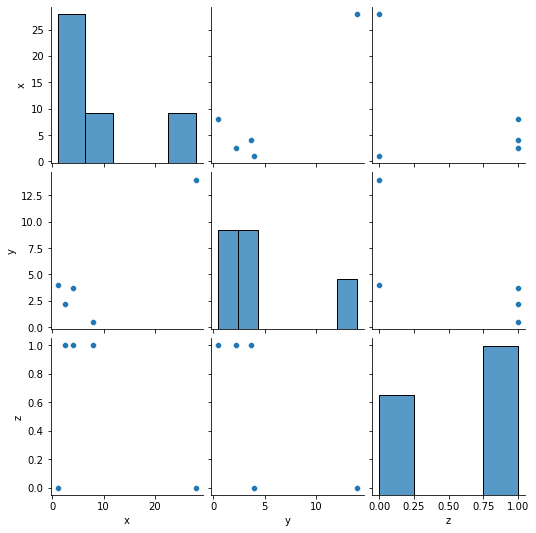

Correlation matrix:
          x         y         z
x  1.000000  0.886600 -0.477015
y  0.886600  1.000000 -0.711696
z -0.477015 -0.711696  1.000000


In [48]:
# create a dataset with three variables
data = {'x': [8.0, 1, 2.5, 4, 28.0],
        'y': [0.5, 4, 2.2, 3.7, 14],
        'z': [1, 0, 1, 1, 0]}
df = pd.DataFrame(data)

# create a scatter plot matrix
sns.pairplot(df)
plt.show()

# calculate the correlation matrix
corr_matrix = df.corr()

print("Correlation matrix:")
print(corr_matrix)

### Outliers
- Natural variation in data
- Change in the behaviors of the observed system
- Errors in data collection

#### Z-score

A Z-score is a statistical measure that indicates how many standard deviations a data point is from the mean of the dataset. It is calculated by subtracting the mean from the data point and then dividing the result by the standard deviation of the dataset.

In [55]:
data = [1, 2, 3, 4, 5, 100]

# Calculate the mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data)

# Define a threshold for identifying an outlier
threshold = 2

# Create an empty list to store the outliers
outliers = []

# Loop through the data
for i in data:
    # Calculate the Z-score for each data point
    z_score = (i - mean) / std_dev

    # Identify data points with a Z-score greater than the threshold as outliers
    if np.abs(z_score) > threshold:
        outliers.append(i)

# Print the list of identified outliers
print(outliers)

[100]
